In [1]:
import sys
import os
import logging
import collections
import itertools

In [2]:
logging.basicConfig(level=logging.WARN)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora.dictionary import Dictionary

c:\users\eemeli\documents\projects\keytopicdetection\.env\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
sys.path.append('../detector/')

In [6]:
style.use('ggplot')

In [7]:
from corpora import Corpora

In [8]:
data_path = 'M:\Projects\KeyTopicDetection\\parsed'
dict_path = '../data/nips_87-18_DICT.txt'

Takes a bit more time this way - but is a bit more memory friendly.

In [9]:
if os.path.exists(dict_path):
    corpora = Corpora(data_path=data_path, prefix='NIPS', iterator='bow', dictionary=dict_path)
else:
    corpora = Corpora(data_path=data_path, prefix='NIPS', iterator='bow', word_up_limit=0.75, word_low_limit=20).build()
    corpora.dictionary.save_as_text(dict_path)

In [16]:
from pipeline.topics import LDAWrapper, document_topics, model_words

Setting the parameters

In [11]:
N_TOPICS = 50
alpha = 5/N_TOPICS
passes = 100
iterations = 500
id2word = corpora.dictionary
eval_every = None
chunksize = 2000

In [12]:
lda = LDAWrapper(
    num_topics=N_TOPICS, 
    alpha=alpha, 
    id2word=id2word,
    eval_every=eval_every,
    batch_size=50,
    verbose=True
)

>**NOTE:** When training with Multicore there might be an issue of the model producing only NaN values. See [link](https://github.com/RaRe-Technologies/gensim/issues/2115) for more details.

In [13]:
%time lda.fit(corpora)

Document 50/8250
Document 100/8250
Document 150/8250
Document 200/8250
Document 250/8250
Document 300/8250
Document 350/8250
Document 400/8250
Document 450/8250
Document 500/8250
Document 550/8250
Document 600/8250
Document 650/8250
Document 700/8250
Document 750/8250
Document 800/8250
Document 850/8250
Document 900/8250
Document 950/8250
Document 1000/8250
Document 1050/8250
Document 1100/8250
Document 1150/8250
Document 1200/8250
Document 1250/8250
Document 1300/8250
Document 1350/8250
Document 1400/8250
Document 1450/8250
Document 1500/8250
Document 1550/8250
Document 1600/8250
Document 1650/8250
Document 1700/8250
Document 1750/8250
Document 1800/8250
Document 1850/8250
Document 1900/8250
Document 1950/8250
Document 2000/8250
Document 2050/8250
Document 2100/8250
Document 2150/8250
Document 2200/8250
Document 2250/8250
Document 2300/8250
Document 2350/8250
Document 2400/8250
Document 2450/8250
Document 2500/8250
Document 2550/8250
Document 2600/8250
Document 2650/8250
Document 2700

Document 5600/8250
Document 5650/8250
Document 5700/8250
Document 5750/8250
Document 5800/8250
Document 5850/8250
Document 5900/8250
Document 5950/8250
Document 6000/8250
Document 6050/8250
Document 6100/8250


Document 6150/8250
Document 6200/8250
Document 6250/8250
Document 6300/8250
Document 6350/8250
Document 6400/8250
Document 6450/8250
Document 6500/8250
Document 6550/8250
Document 6600/8250


Document 6650/8250
Document 6700/8250
Document 6750/8250
Document 6800/8250
Document 6850/8250
Document 6900/8250
Document 6950/8250
Document 7000/8250
Document 7050/8250
Document 7100/8250
Document 7150/8250
Document 7200/8250
Document 7250/8250
Document 7300/8250
Document 7350/8250
Document 7400/8250
Document 7450/8250
Document 7500/8250
Document 7550/8250
Document 7600/8250
Document 7650/8250
Document 7700/8250
Document 7750/8250
Document 7800/8250
Document 7850/8250


Document 7900/8250
Document 7950/8250
Document 8000/8250
Document 8050/8250
Document 8100/8250
Document 8150/8250
Document 8200/8250
Wall time: 59min 30s


One thing to note is that the LDA model itself seems pretty easy to train and it does not consume too much memory.

In [31]:
lda.save('lda_nips_87-18_v9')

In [17]:
%time df = document_topics(lda, corpora)

Wall time: 1min 40s


In [18]:
df.shape

(8246, 52)

In [19]:
word_df = model_words(lda, n=15)

In [20]:
word_df

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,...,Topic-40,Topic-41,Topic-42,Topic-43,Topic-44,Topic-45,Topic-46,Topic-47,Topic-48,Topic-49
0,estimators,option,advances,image,latent,abc,models,tucker,batch,generation,...,bound,object,shape,kernels,dataset,lifted,https,convex,cache,speaker
1,formulas,optimize,pca,deep,posterior,path,random,gradients,regression,scores,...,pruning,translation,smt,inner,generative,environments,lemma,similarity,resnet,cloning
2,equivariant,greedy,wang,memory,elbo,uncertainty,machine,mini,expectation,transformer,...,sparsity,vision,mixture,url,synthesis,evaluations,liu,factors,cifar,adaptation
3,minimization,games,ground,labels,projection,runtime,optimization,canada,com,induced,...,decoding,market,http,processors,mesh,variates,systematic,proximal,encoder,synaptic
4,instances,minimax,guarantees,semantic,warping,confusion,algorithms,sizes,corr,oord,...,channel,convolution,kronecker,truth,gan,jointly,budget,eigenvalues,mnist,speakers
5,google,privacy,sphere,art,edges,paths,size,org,optimizing,reparameterization,...,adam,cnns,device,den,gans,richard,intermediate,driven,speech,signals
6,operators,combinatorial,compact,shift,priors,sup,accuracy,gpus,tensors,autoregressive,...,dinh,interpretable,blocks,compression,generator,elimination,expectations,vinyals,proxy,remark
7,def,parametric,popular,baselines,projected,kaiser,points,epochs,differentiable,foundations,...,devices,estimated,maximizing,satisfying,discriminator,investigate,user,elicitation,audio,brain
8,sgd,daniel,scoring,kingma,met,guaranteed,computation,fundamental,online,middle,...,papers,transformations,irreducible,gaussians,wasserstein,parallelism,conditioned,codes,gpu,groups
9,simplex,iid,transforms,martin,spike,nonlinearity,task,handle,automatic,hardware,...,ensure,zhang,initialization,smola,vae,supervision,price,thomas,decoder,deviation


## Analysis

In [21]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
years = df['year'].unique()

In [23]:
dists_over_year = []
for year in years:
    year_data = df.where(df.year == year).dropna().drop(['year', 'doc'], axis=1).values
    dists_over_year.append(year_data.sum(axis=0)/year_data.shape[0])

In [24]:
dists_over_year = np.array(dists_over_year)

In [25]:
from scipy.ndimage.filters import gaussian_filter1d

In [26]:
topic_order = [t for t, _ in lda.print_topics(lda.num_topics)]

In [27]:
result_path = '../data/results'

In [28]:
if not os.path.exists(result_path):
    os.mkdir(result_path)

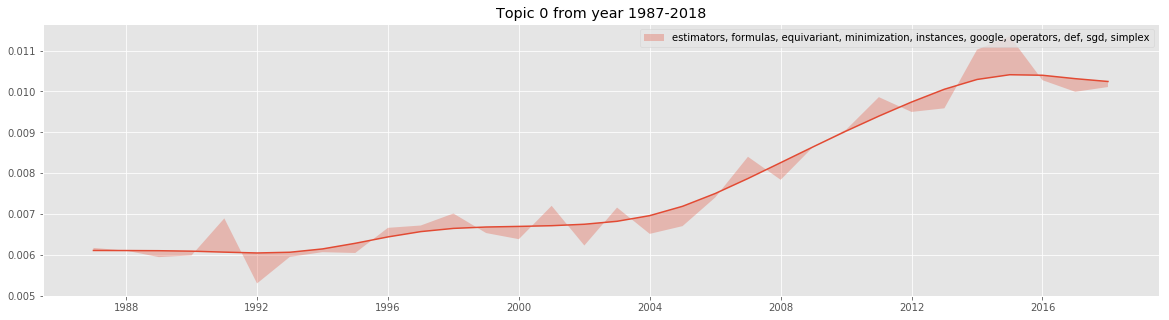

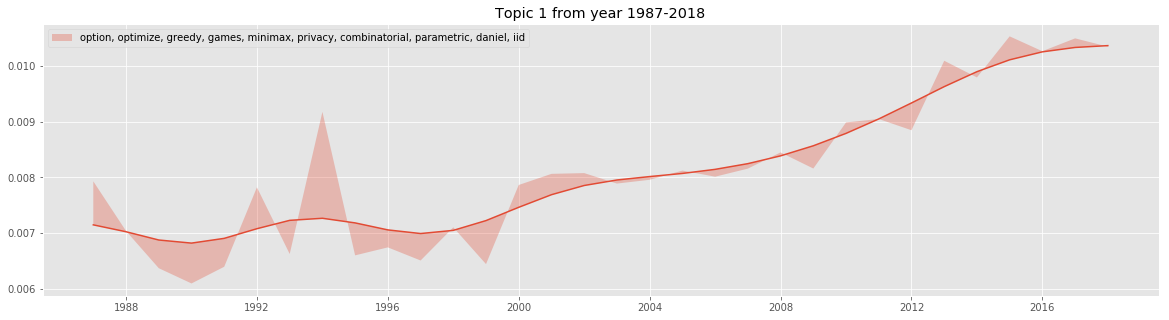

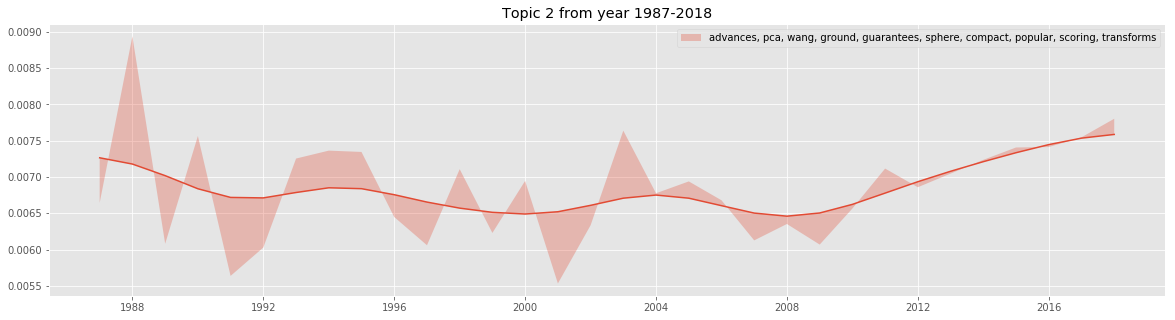

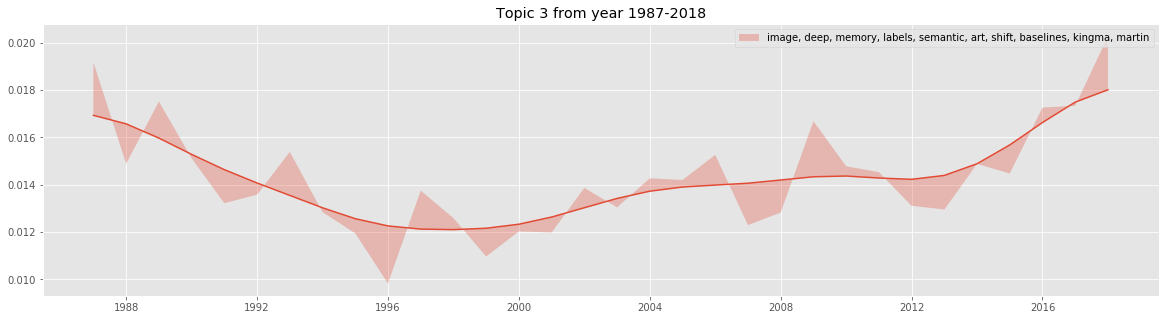

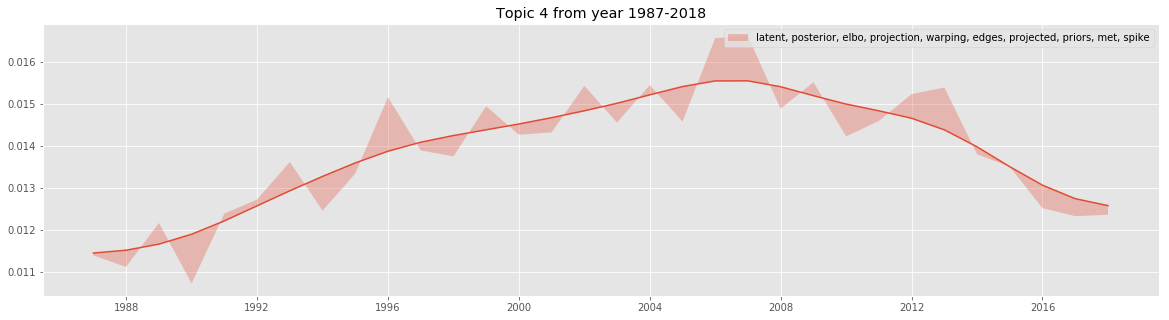

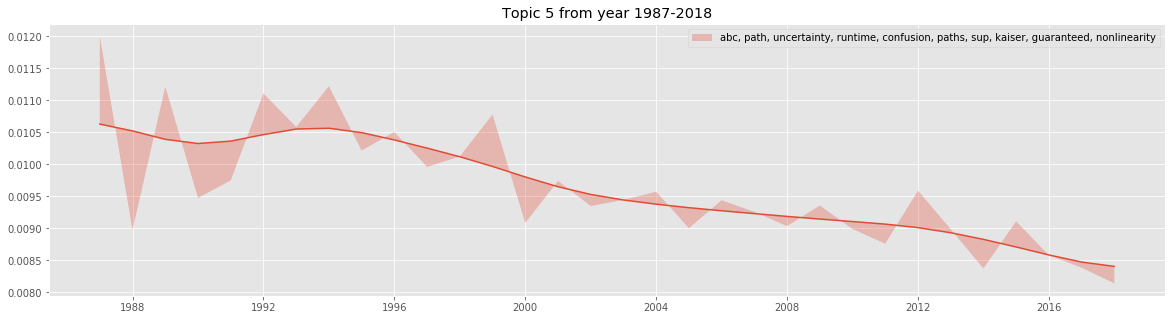

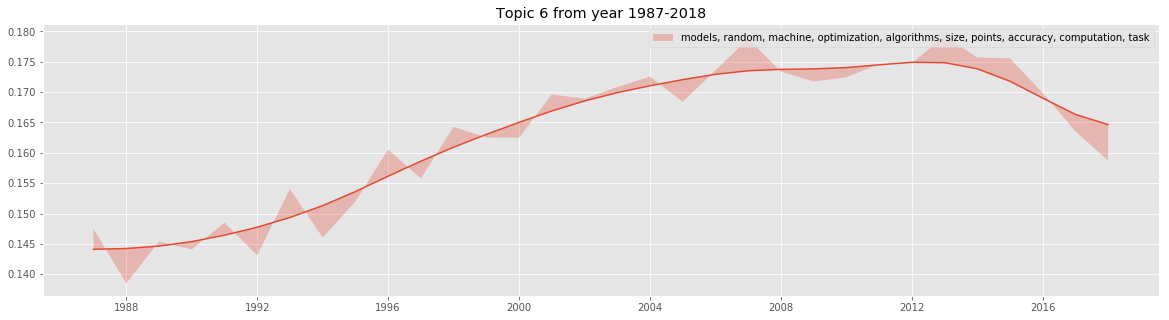

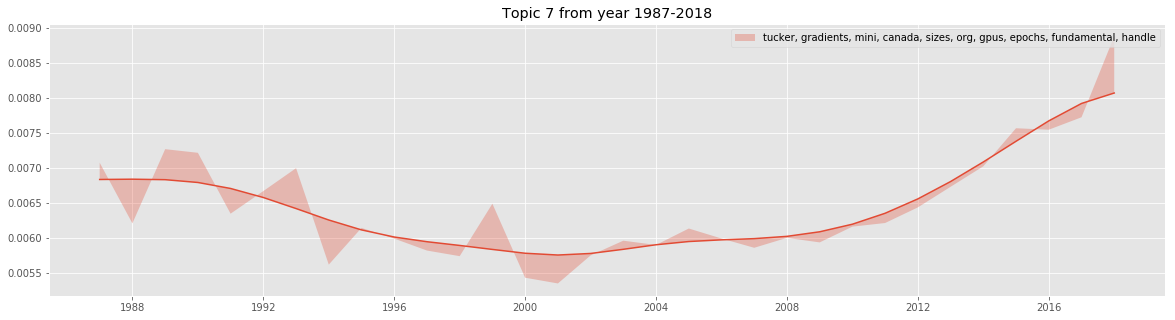

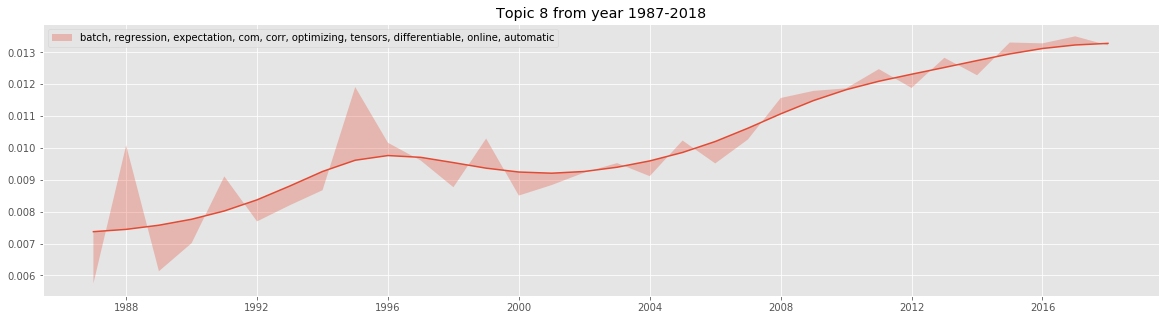

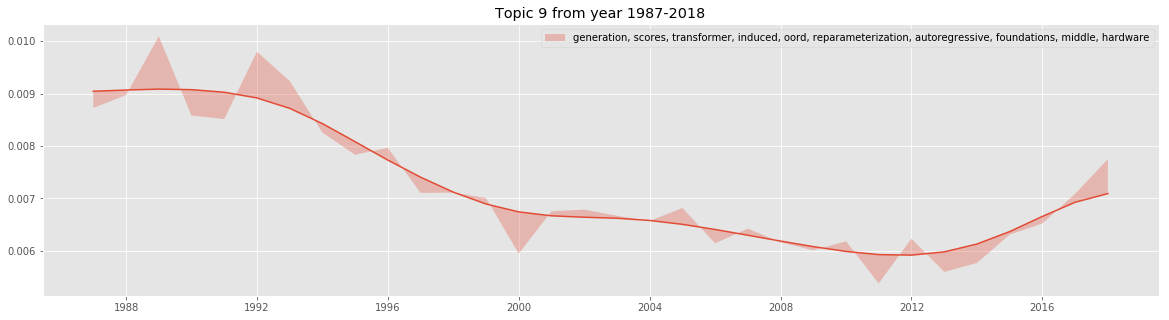

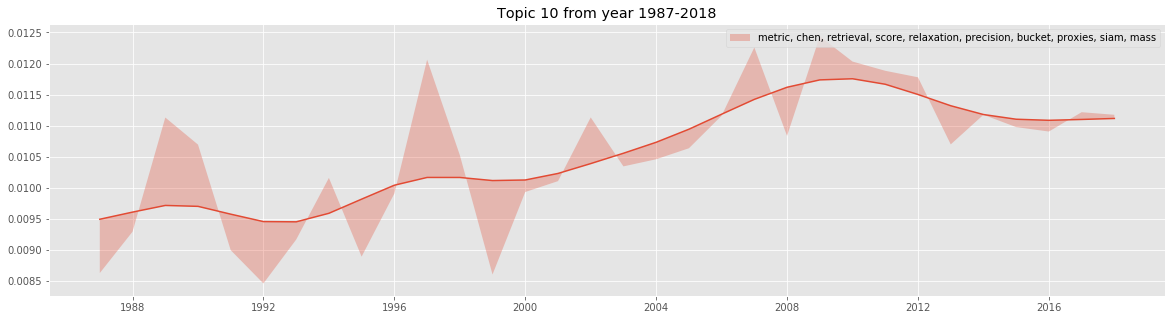

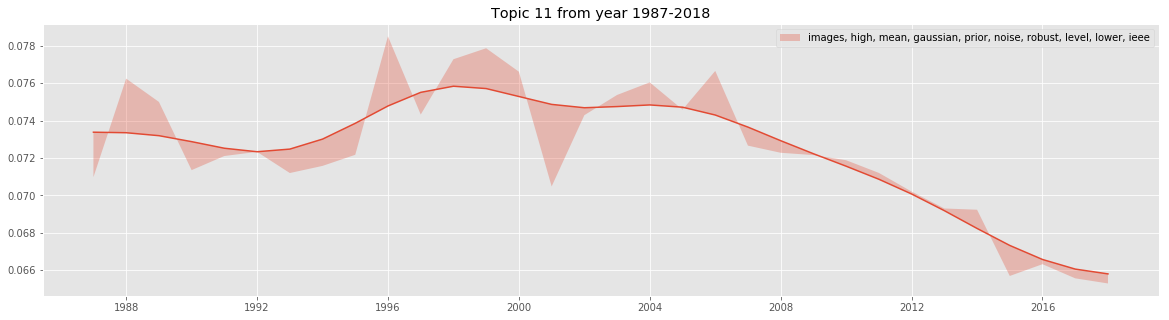

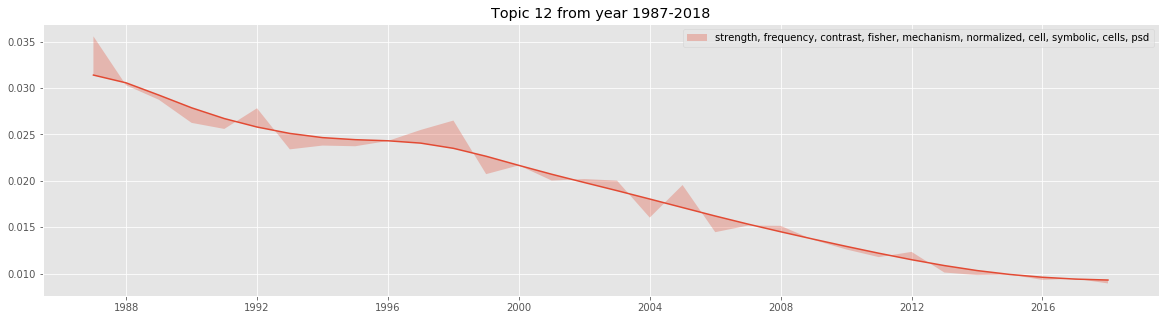

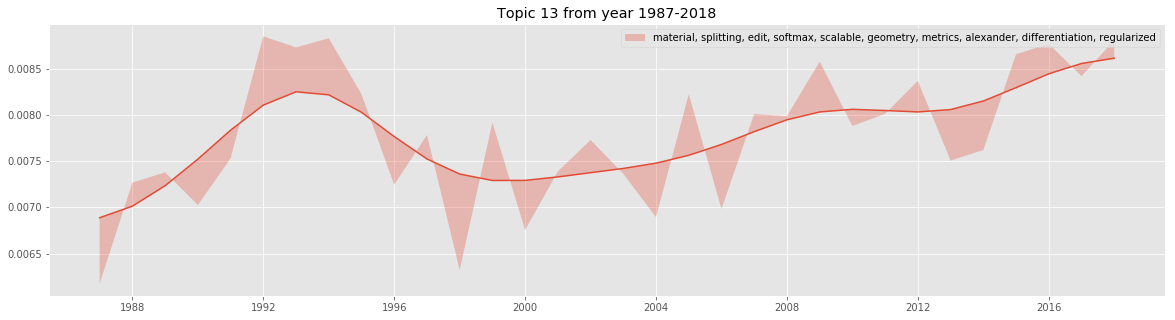

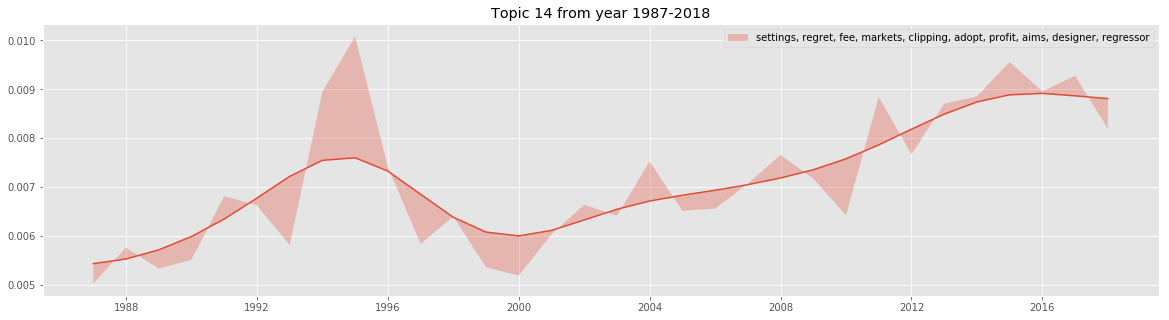

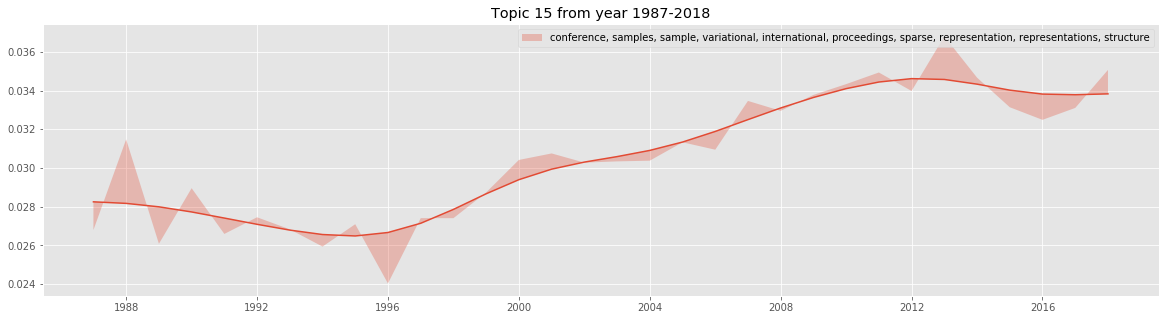

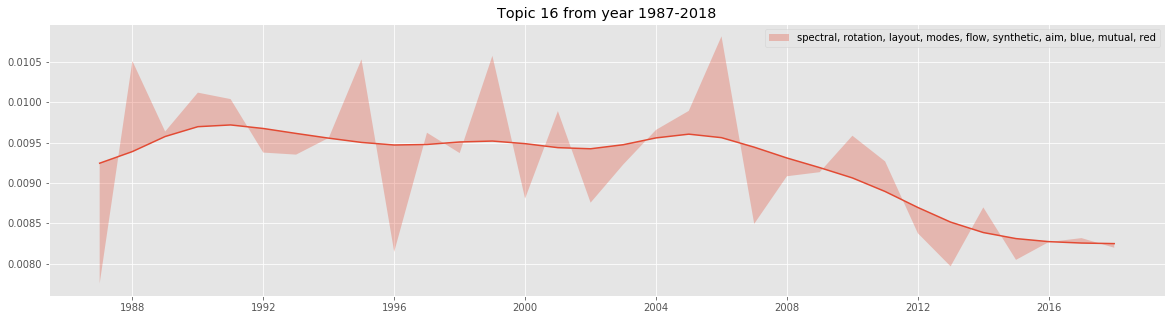

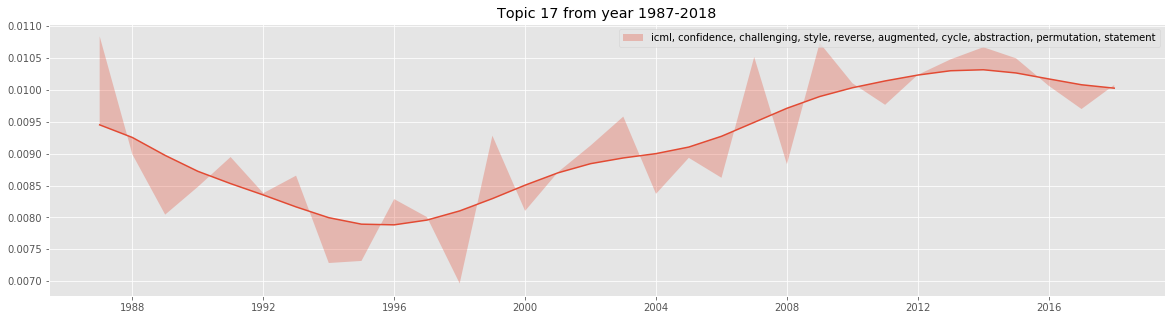

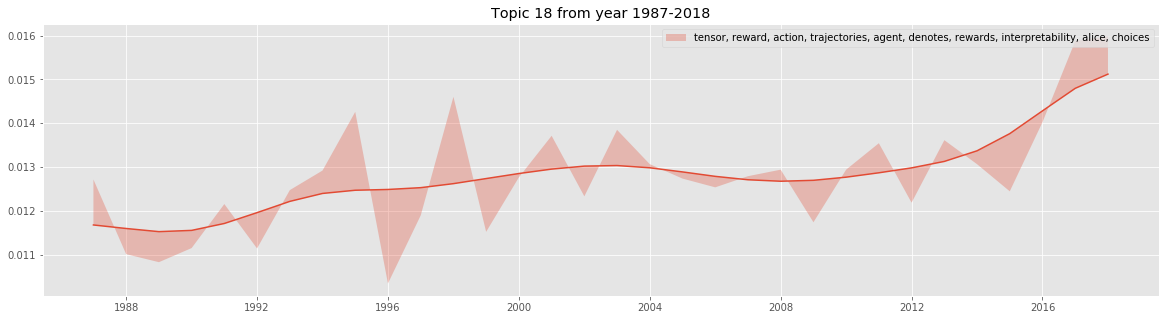

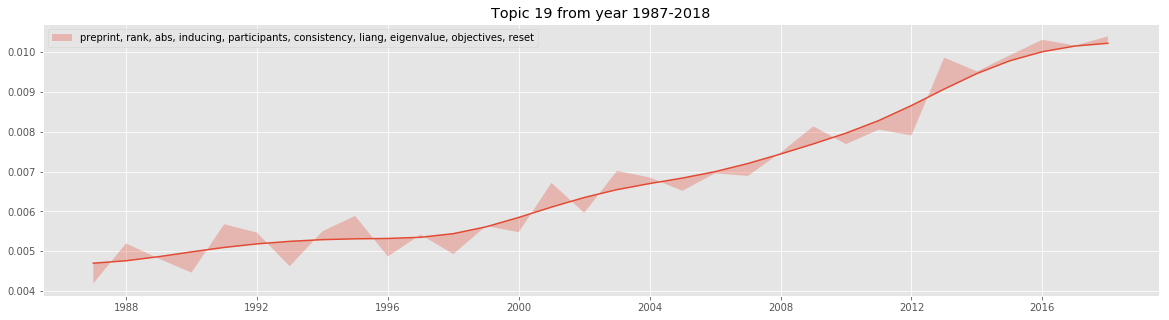

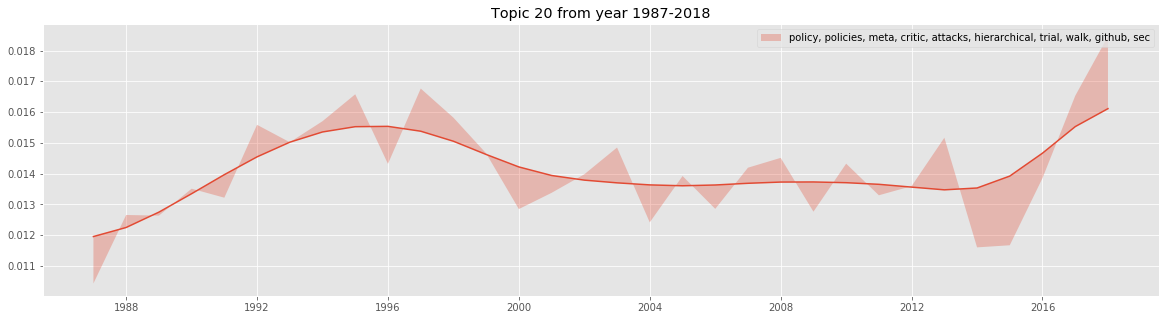

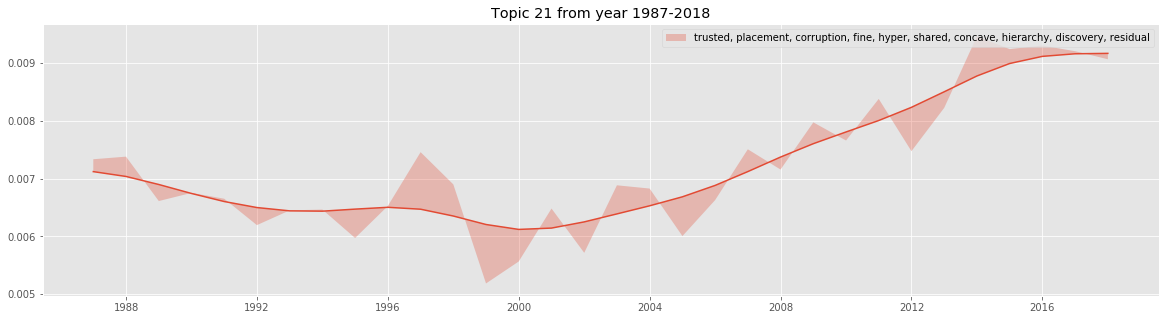

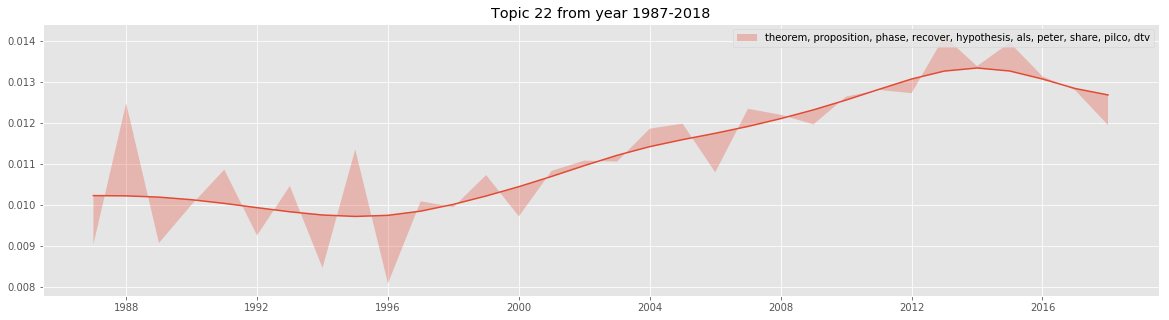

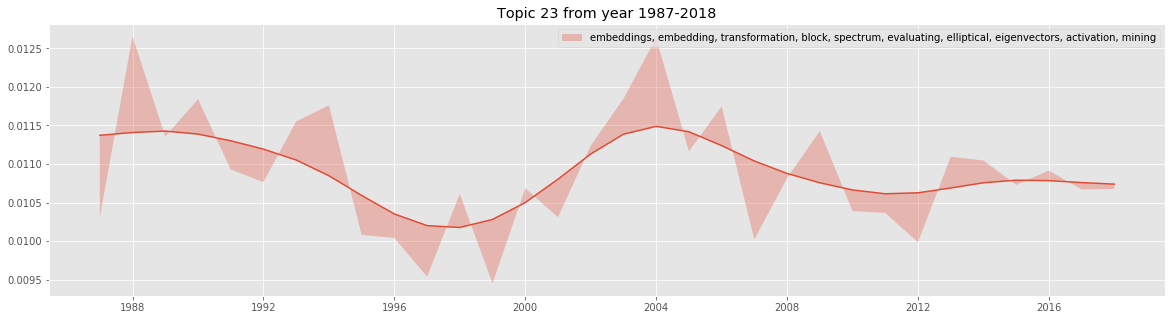

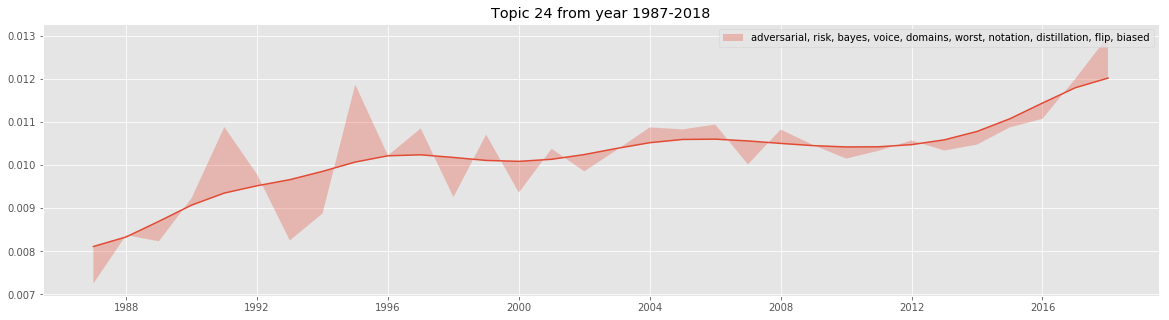

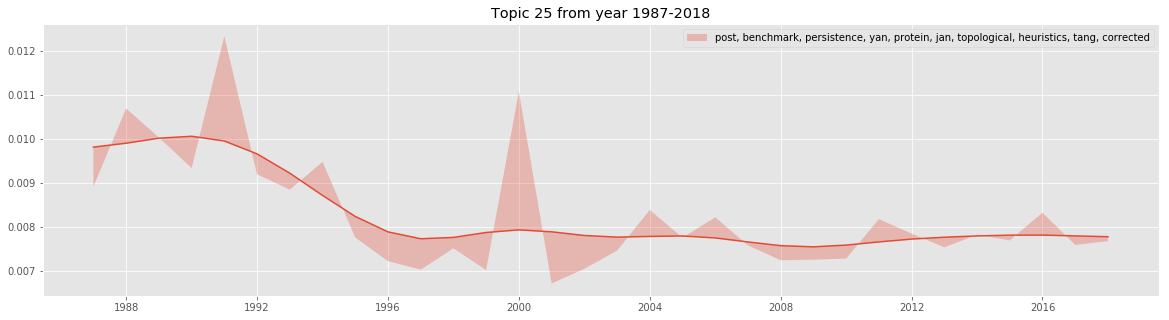

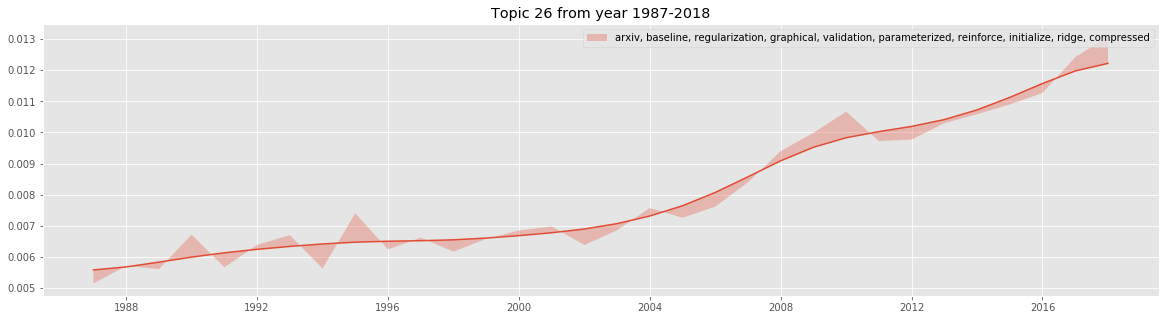

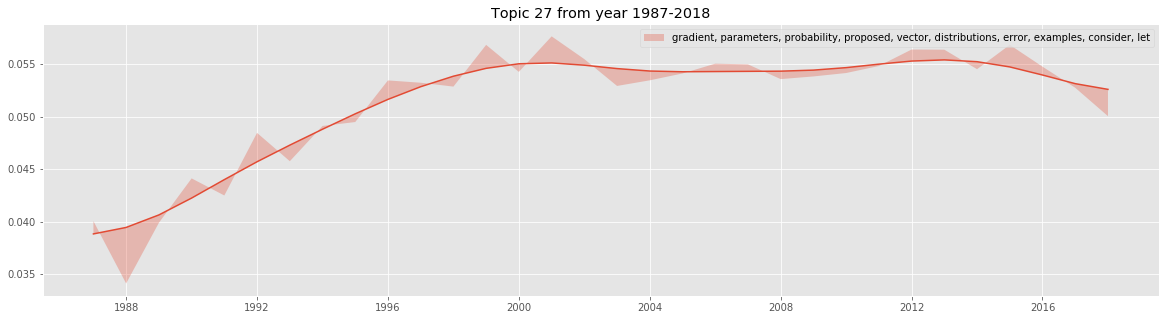

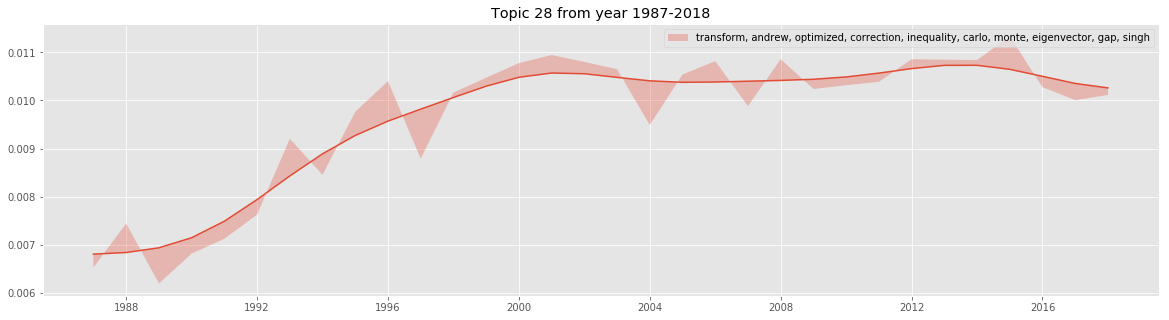

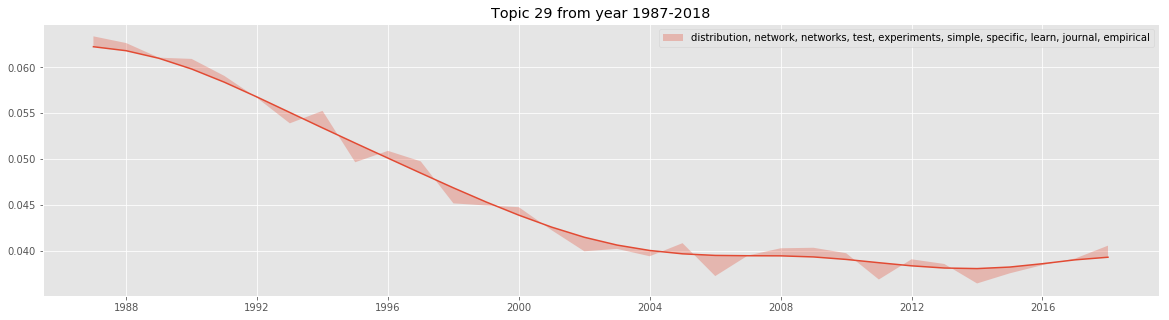

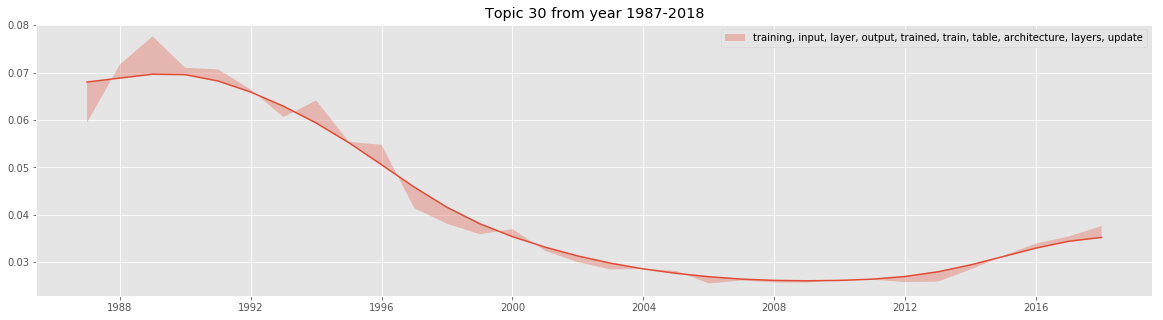

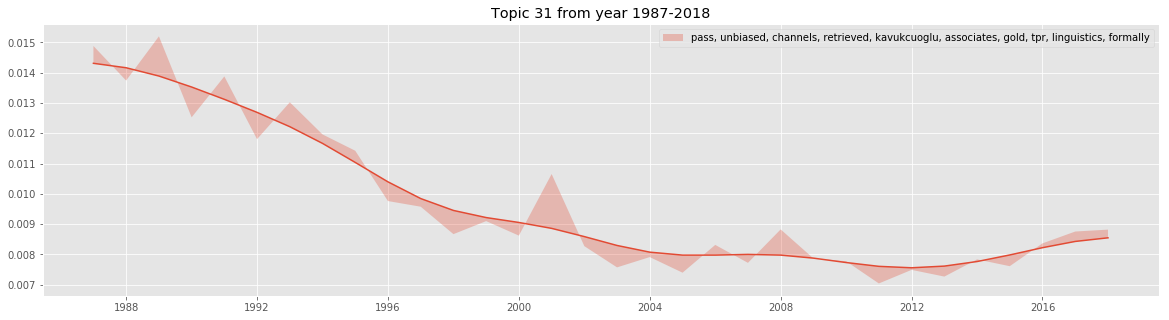

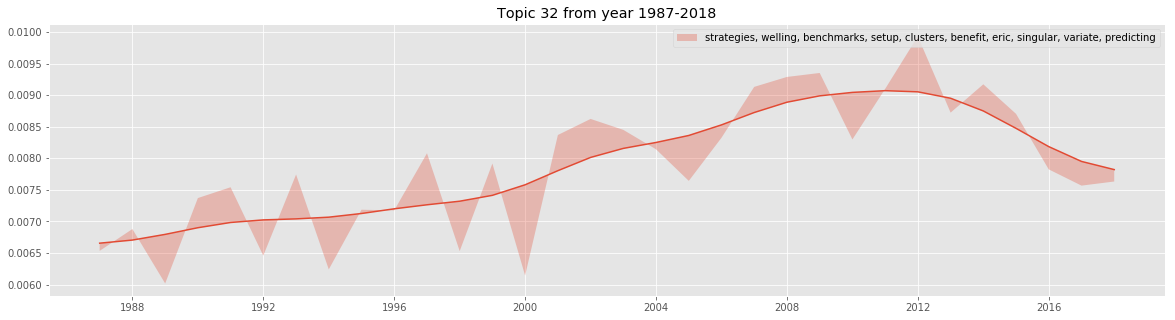

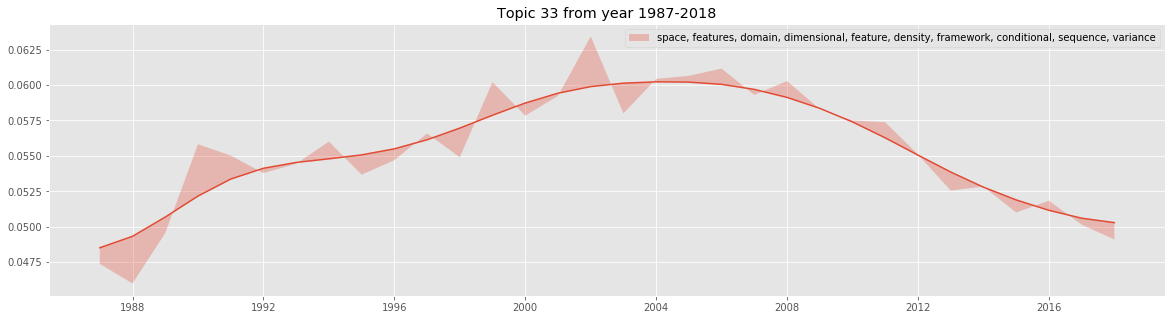

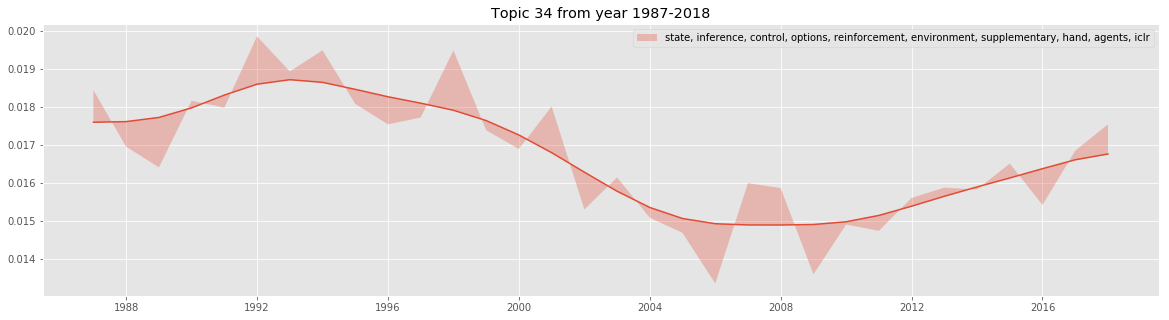

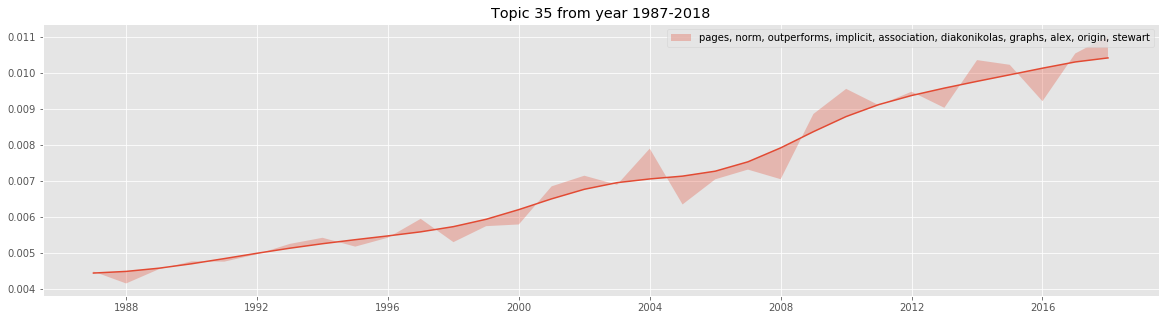

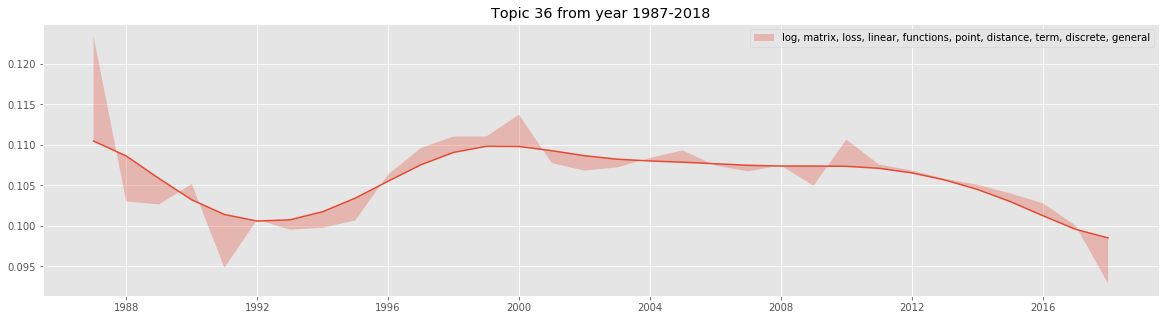

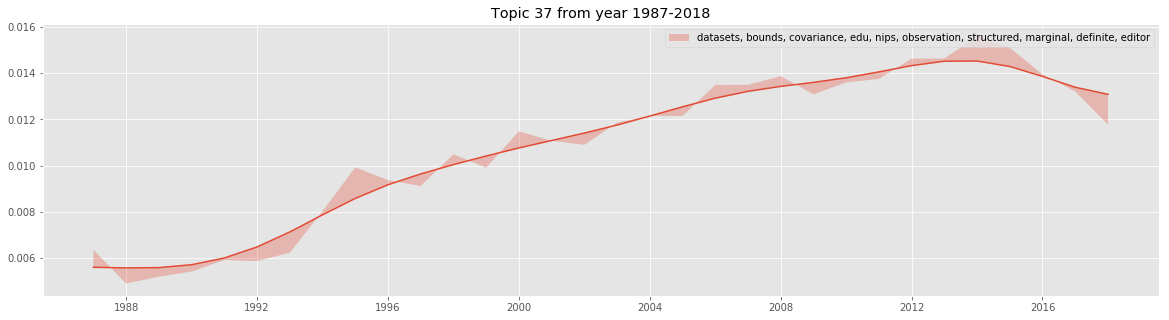

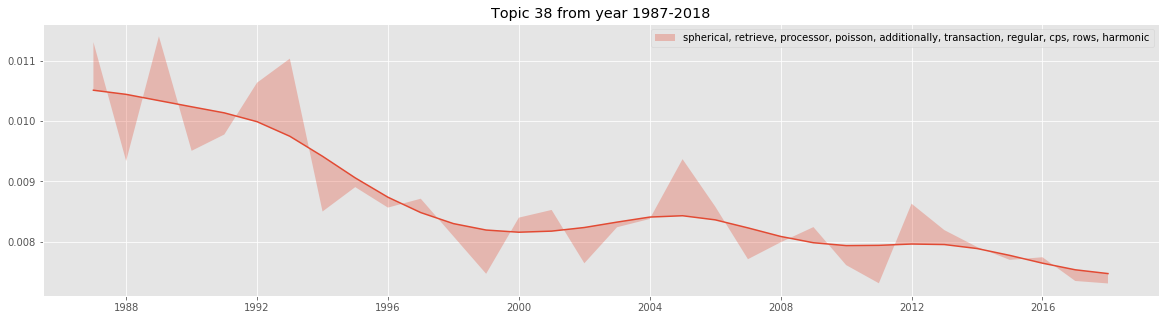

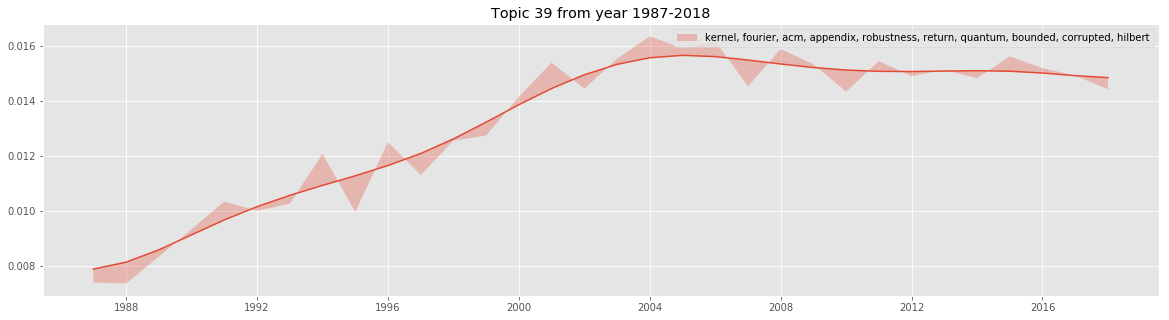

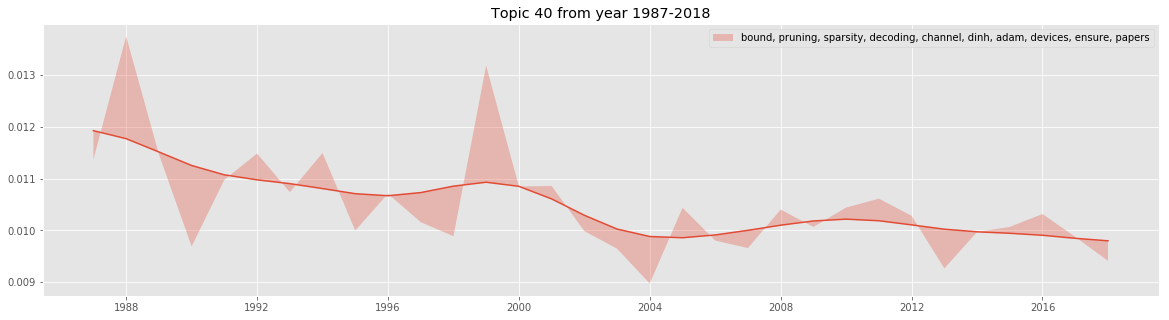

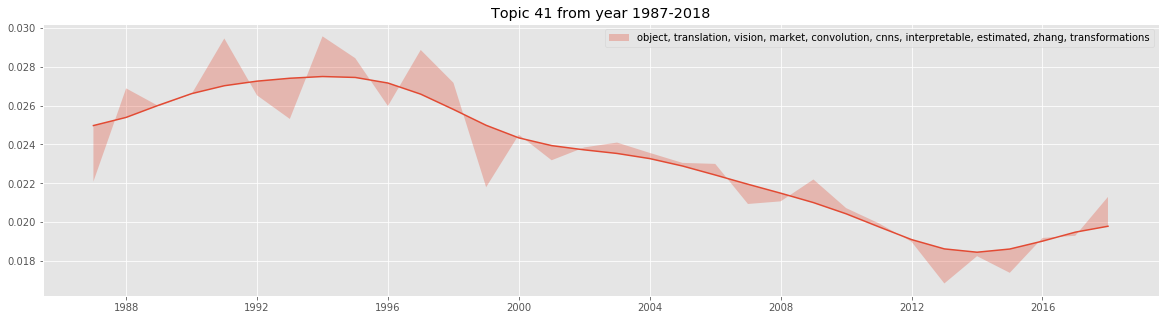

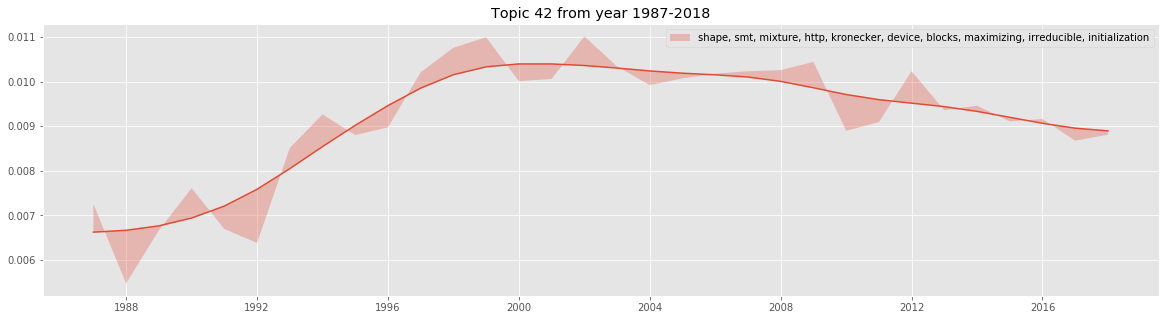

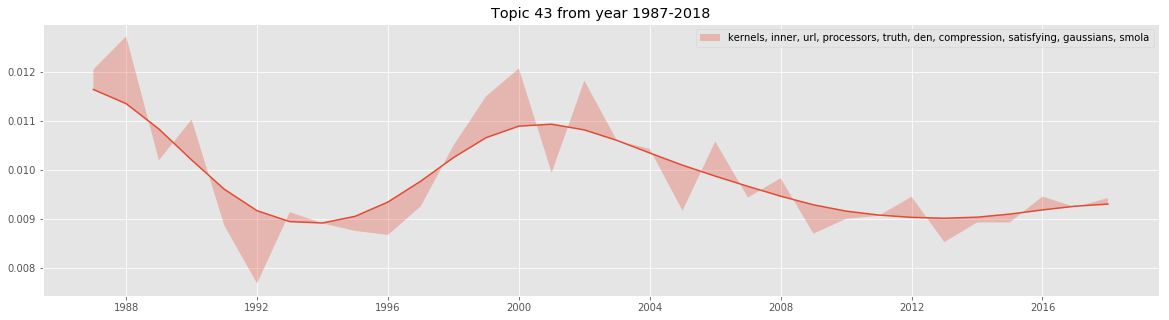

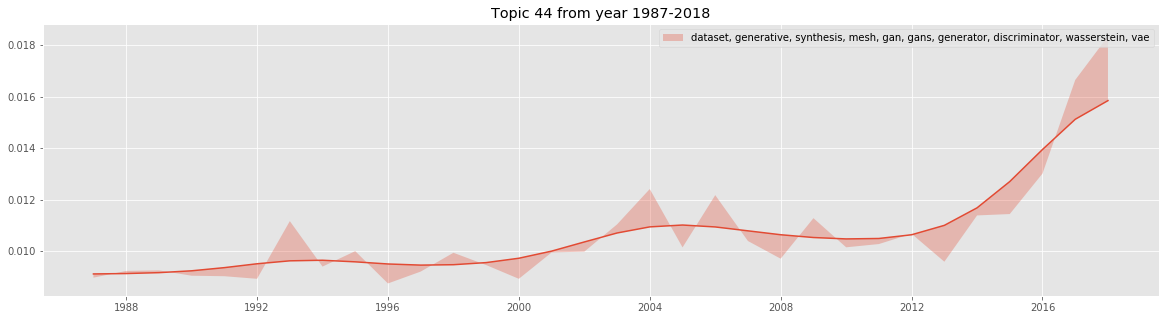

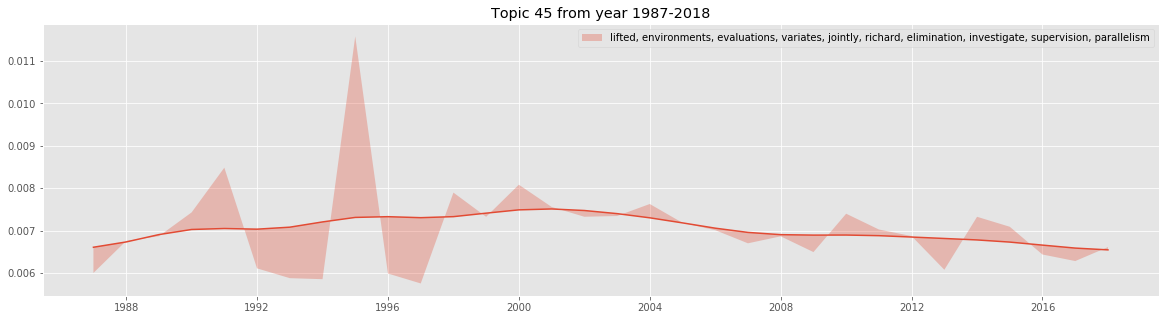

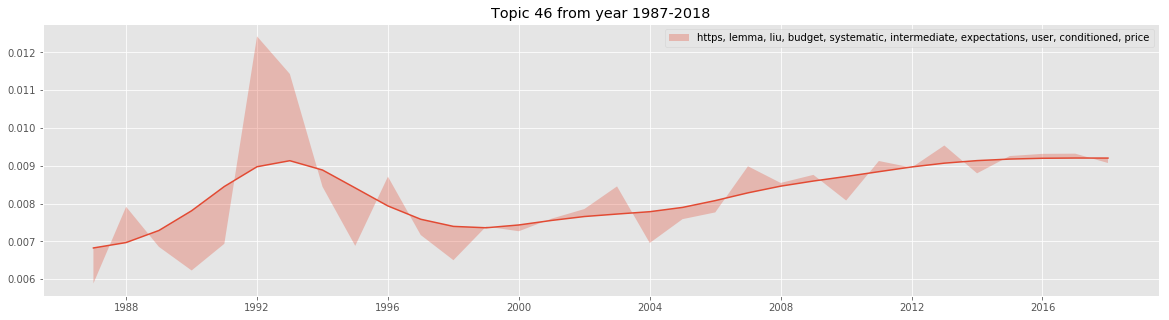

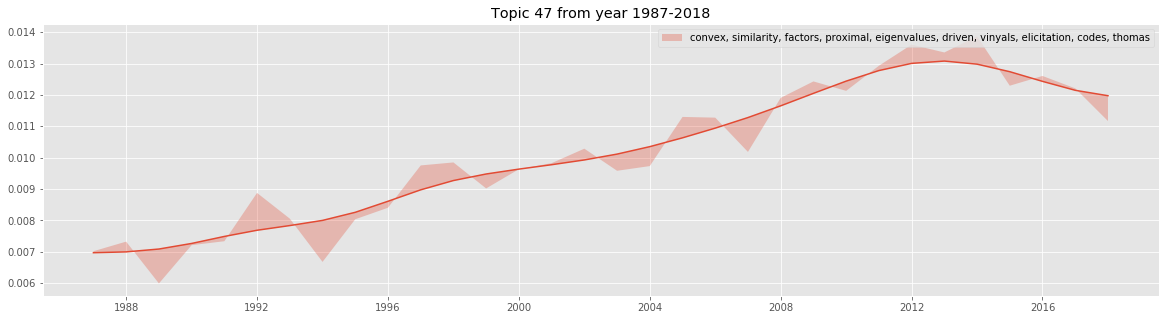

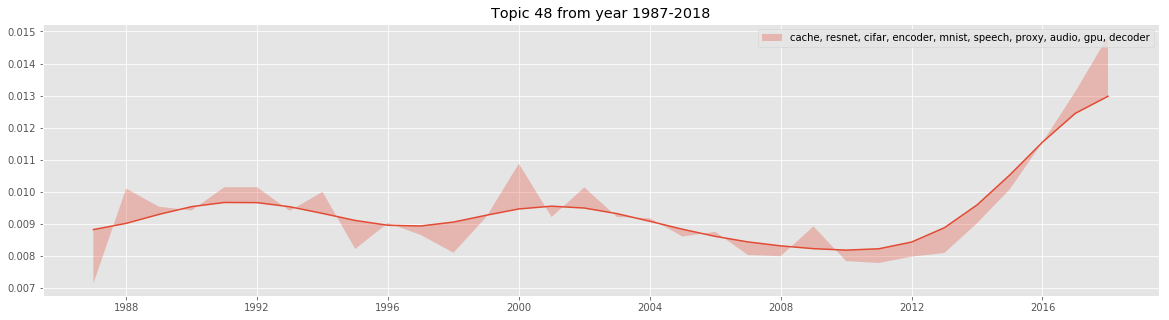

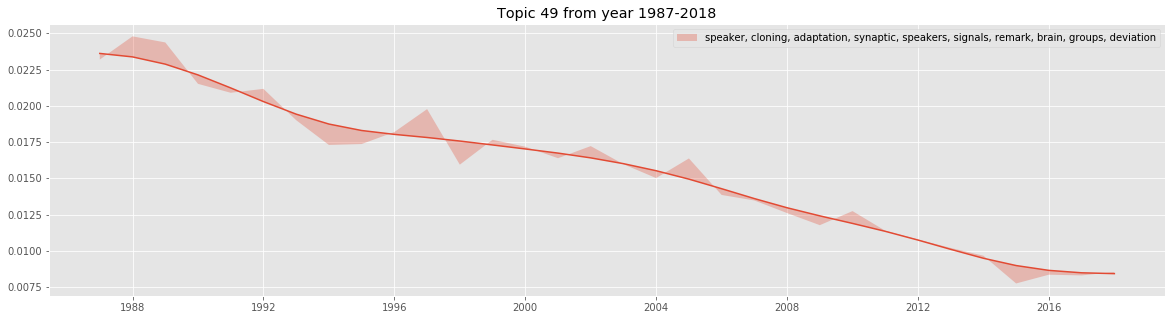

In [93]:
for i in range(dists_over_year.shape[1]):
    plt.figure(figsize=(20,5))
    top_words = ', '.join([x.split('*')[1].strip().replace('"', '') for x in lda.print_topic(i, 10).split('+')])
    axis = pd.to_datetime(years)
    original = dists_over_year[:, i]
    smooth = gaussian_filter1d(original, sigma=2)
    plt.plot(axis, smooth)
    plt.fill_between(axis, smooth, smooth-(smooth-original), label=top_words, alpha=0.3)
    #plt.scatter(axis, original, alpha=0.5)
    #plt.plot(axis, original, c='black', alpha=0.5)
    plt.title(f'Topic {i} from year {years[0]}-{years[-1]}')
    plt.legend()
    plt.savefig(os.path.join(result_path, f'topic_{i}_lda_K{N_TOPICS}_with_stem_words_alpha-{alpha}.png'))
    plt.show()

In [30]:
previous = dists_over_year[0, :]
dists_over_year.shape

(32, 50)

In [31]:
dists_over_year.sum(axis=0)#/dists_over_year.shape[0]

array([0.24470439, 0.2600419 , 0.21909071, 0.45683102, 0.44374251,
       0.30815146, 5.21696188, 0.20612381, 0.32668998, 0.23024963,
       0.33772505, 2.31668113, 0.61223161, 0.24919302, 0.22818777,
       0.97793824, 0.29506817, 0.29258523, 0.40920177, 0.21844836,
       0.45109851, 0.23060394, 0.36124689, 0.34867319, 0.32655776,
       0.26424049, 0.25668481, 1.64564587, 0.30897991, 1.46490081,
       1.32616568, 0.30963497, 0.25205578, 1.77421775, 0.53482977,
       0.22583111, 3.38322686, 0.34649781, 0.2760624 , 0.42266862,
       0.33582223, 0.74600679, 0.29289349, 0.31391737, 0.33969942,
       0.22521634, 0.26399858, 0.32386565, 0.30028269, 0.49862687])

In [32]:
np.argsort(dists_over_year.sum(axis=0))[-10:]

array([12, 41, 15, 30, 29, 27, 33, 11, 36,  6], dtype=int64)

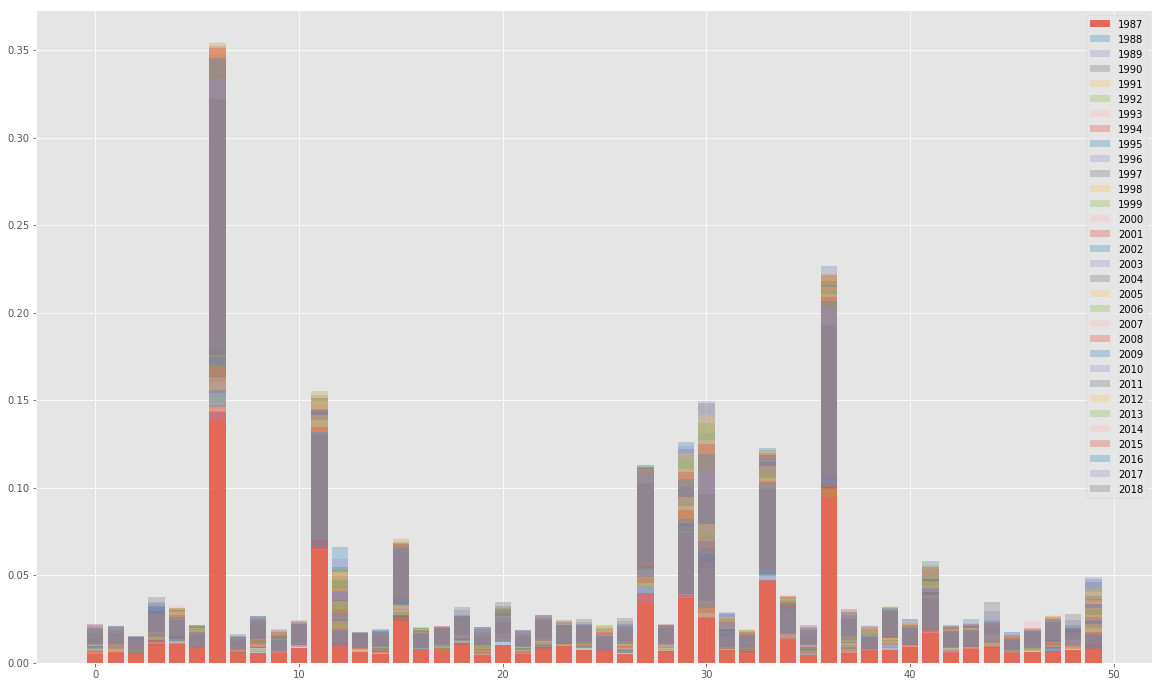

In [33]:
plt.figure(figsize=(20,12))

previous = dists_over_year[0, :]
axis = range(dists_over_year.shape[1])

plt.bar(axis, previous, alpha=0.8, label=years[0])
for i in range(1, dists_over_year.shape[0]):
    current = dists_over_year[i, :]
    alpha = 0.3
    if current.max() > .3:
        alpha = 1
    plt.bar(axis, current, bottom=previous, label=years[i], alpha=alpha)
    previous = current
plt.legend()
#plt.savefig(os.path.join(result_path, 'overall_topic_dist_without_stem_v3.png'))
plt.show()

In [47]:
dists_over_year.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

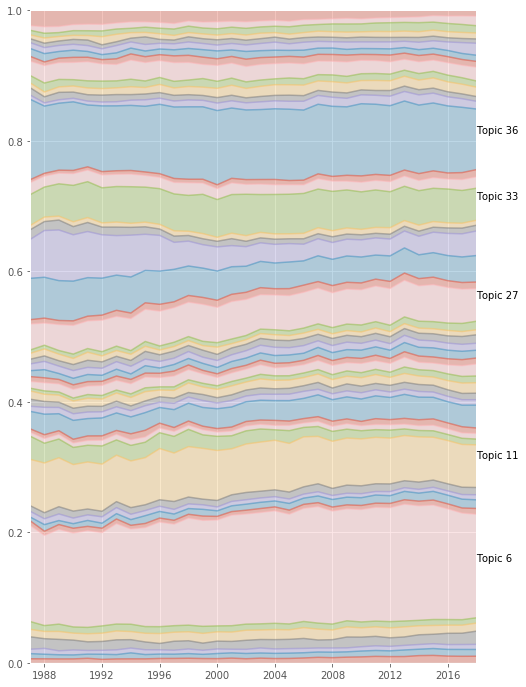

In [92]:
plt.figure(figsize=(8,12))

previous = np.zeros((dists_over_year.shape[0], ))
axis = pd.to_datetime(years)

for i in range(0, dists_over_year.shape[1]):
    current = dists_over_year[:, i] + previous
    plt.plot(axis, current, alpha=0.5)
    plt.fill_between(axis, current, previous, alpha=0.3)

    diff = current.max()-previous.max()
    if diff >= 0.05:
        plt.annotate(f'Topic {i}', xy=(pd.to_datetime(years[-1]), previous.max()+diff/2))

    previous = current

plt.ylim(bottom=0, top=1)
plt.xlim(left=pd.to_datetime(years[0]),right=pd.to_datetime(years[-1]))
plt.savefig('overall_topics.png')
plt.show()

## Problems

By experimenting with different parameters and ways to preprocess the data one conclusion can be derived: The topic model parameters are hard to setup correctly and the topics can look arbitrary and noicy most of the time.